In [30]:
#Standard python libraries
import numpy as np
import pandas as pd
import pycaret
import pickle
from sklearn.model_selection import train_test_split
from pycaret.classification import *
#https://linuxtut.com/en/cf9b37d3c54e7ba2c8e5/

In [31]:
df = pd.read_csv(r"C:\Users\kaush\Documents\6390_Kaggle_Project_2\new_train.csv")

In [32]:
df = df.drop(columns=["Unnamed: 0"])
df

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,S2_B12_jan,S1_VV_jan,S1_VH_jan,ERA5_temperature_2m_jan,ERA5_total_precipitation_jan,topo_elevation_jan,topo_slope_jan,NDVI_jan,S2_B2_feb,S2_B3_feb,S2_B4_feb,S2_B5_feb,S2_B6_feb,S2_B7_feb,S2_B8_feb,S2_B8A_feb,S2_B9_feb,S2_B11_feb,S2_B12_feb,S1_VV_feb,S1_VH_feb,ERA5_temperature_2m_feb,ERA5_total_precipitation_feb,topo_elevation_feb,topo_slope_feb,NDVI_feb,S2_B2_mar,S2_B3_mar,S2_B4_mar,S2_B5_mar,S2_B6_mar,S2_B7_mar,S2_B8_mar,S2_B8A_mar,S2_B9_mar,S2_B11_mar,S2_B12_mar,S1_VV_mar,S1_VH_mar,ERA5_temperature_2m_mar,ERA5_total_precipitation_mar,topo_elevation_mar,topo_slope_mar,NDVI_mar,S2_B2_apr,S2_B3_apr,S2_B4_apr,S2_B5_apr,S2_B6_apr,S2_B7_apr,S2_B8_apr,S2_B8A_apr,S2_B9_apr,S2_B11_apr,S2_B12_apr,S1_VV_apr,S1_VH_apr,ERA5_temperature_2m_apr,ERA5_total_precipitation_apr,topo_elevation_apr,topo_slope_apr,NDVI_apr,S2_B2_may,S2_B3_may,S2_B4_may,S2_B5_may,S2_B6_may,S2_B7_may,S2_B8_may,S2_B8A_may,S2_B9_may,S2_B11_may,S2_B12_may,S1_VV_may,S1_VH_may,ERA5_temperature_2m_may,ERA5_total_precipitation_may,topo_elevation_may,topo_slope_may,NDVI_may,S2_B2_jun,S2_B3_jun,S2_B4_jun,S2_B5_jun,S2_B6_jun,S2_B7_jun,S2_B8_jun,S2_B8A_jun,S2_B9_jun,S2_B11_jun,S2_B12_jun,S1_VV_jun,S1_VH_jun,ERA5_temperature_2m_jun,ERA5_total_precipitation_jun,topo_elevation_jun,topo_slope_jun,NDVI_jun,S2_B2_jul,S2_B3_jul,S2_B4_jul,S2_B5_jul,S2_B6_jul,S2_B7_jul,S2_B8_jul,S2_B8A_jul,S2_B9_jul,S2_B11_jul,S2_B12_jul,S1_VV_jul,S1_VH_jul,ERA5_temperature_2m_jul,ERA5_total_precipitation_jul,topo_elevation_jul,topo_slope_jul,NDVI_jul,S2_B2_aug,S2_B3_aug,S2_B4_aug,S2_B5_aug,S2_B6_aug,S2_B7_aug,S2_B8_aug,S2_B8A_aug,S2_B9_aug,S2_B11_aug,S2_B12_aug,S1_VV_aug,S1_VH_aug,ERA5_temperature_2m_aug,ERA5_total_precipitation_aug,topo_elevation_aug,topo_slope_aug,NDVI_aug,S2_B2_sep,S2_B3_sep,S2_B4_sep,S2_B5_sep,S2_B6_sep,S2_B7_sep,S2_B8_sep,S2_B8A_sep,S2_B9_sep,S2_B11_sep,S2_B12_sep,S1_VV_sep,S1_VH_sep,ERA5_temperature_2m_sep,ERA5_total_precipitation_sep,topo_elevation_sep,topo_slope_sep,NDVI_sep,S2_B2_oct,S2_B3_oct,S2_B4_oct,S2_B5_oct,S2_B6_oct,S2_B7_oct,S2_B8_oct,S2_B8A_oct,S2_B9_oct,S2_B11_oct,S2_B12_oct,S1_VV_oct,S1_VH_oct,ERA5_temperature_2m_oct,ERA5_total_precipitation_oct,topo_elevation_oct,topo_slope_oct,NDVI_oct,S2_B2_nov,S2_B3_nov,S2_B4_nov,S2_B5_nov,S2_B6_nov,S2_B7_nov,S2_B8_nov,S2_B8A_nov,S2_B9_nov,S2_B11_nov,S2_B12_nov,S1_VV_nov,S1_VH_nov,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,topo_elevation_nov,topo_slope_nov,NDVI_nov,S2_B2_dec,S2_B3_dec,S2_B4_dec,S2_B5_dec,S2_B6_dec,S2_B7_dec,S2_B8_dec,S2_B8A_dec,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS
0,-14.271277,-21.134172,957.531174,1019.557045,1230.022834,1435.138891,1693.702270,1805.411109,1891.557355,2020.567257,813.448973,2080.473917,1323.079548,281.709319,0.000211,1985.132508,0.889839,0.279574,-15.609204,-25.591754,1328.905608,1159.205172,1455.870367,1862.593978,1794.465460,2440.056316,2384.410237,2666.268567,890.697913,3067.634208,2142.679335,307.780824,-0.000013,1941.930728,1.109999,0.252091,-12.401028,-22.292052,1365.147087,1126.991171,1534.871317,1577.539897,1978.947979,2074.138698,2238.649906,2566.575991,1020.476556,3038.132792,2272.401728,267.254132,0.001306,1869.593572,0.818750,0.241079,-10.677261,-18.583090,1211.143419,1104.546100,1347.848092,1275.747978,1842.672726,1883.683173,1890.074236,1958.662135,644.480589,2361.564648,1651.266665,307.701561,0.009269,1970.906230,0.998502,0.236121,-9.990143,-16.444131,909.900294,1151.941157,805.140825,1090.039827,1978.561041,2581.405220,2181.984499,2585.442812,486.661889,1608.271910,712.339431,312.649093,0.012196,2093.581734,1.053133,0.399304,-9.308459,-17.599314,1144.656578,930.306208,741.161872,1212.432022,1911.596129,2350.890062,2393.316267,2554.006608,450.025705,1501.680859,737.504770,263.911346,0.016363,2066.212238,0.831217,0.407875,-10.715842,-16.909667,842.72030

In [33]:
df.describe()

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,S2_B12_jan,S1_VV_jan,S1_VH_jan,ERA5_temperature_2m_jan,ERA5_total_precipitation_jan,topo_elevation_jan,topo_slope_jan,NDVI_jan,S2_B2_feb,S2_B3_feb,S2_B4_feb,S2_B5_feb,S2_B6_feb,S2_B7_feb,S2_B8_feb,S2_B8A_feb,S2_B9_feb,S2_B11_feb,S2_B12_feb,S1_VV_feb,S1_VH_feb,ERA5_temperature_2m_feb,ERA5_total_precipitation_feb,topo_elevation_feb,topo_slope_feb,NDVI_feb,S2_B2_mar,S2_B3_mar,S2_B4_mar,S2_B5_mar,S2_B6_mar,S2_B7_mar,S2_B8_mar,S2_B8A_mar,S2_B9_mar,S2_B11_mar,S2_B12_mar,S1_VV_mar,S1_VH_mar,ERA5_temperature_2m_mar,ERA5_total_precipitation_mar,topo_elevation_mar,topo_slope_mar,NDVI_mar,S2_B2_apr,S2_B3_apr,S2_B4_apr,S2_B5_apr,S2_B6_apr,S2_B7_apr,S2_B8_apr,S2_B8A_apr,S2_B9_apr,S2_B11_apr,S2_B12_apr,S1_VV_apr,S1_VH_apr,ERA5_temperature_2m_apr,ERA5_total_precipitation_apr,topo_elevation_apr,topo_slope_apr,NDVI_apr,S2_B2_may,S2_B3_may,S2_B4_may,S2_B5_may,S2_B6_may,S2_B7_may,S2_B8_may,S2_B8A_may,S2_B9_may,S2_B11_may,S2_B12_may,S1_VV_may,S1_VH_may,ERA5_temperature_2m_may,ERA5_total_precipitation_may,topo_elevation_may,topo_slope_may,NDVI_may,S2_B2_jun,S2_B3_jun,S2_B4_jun,S2_B5_jun,S2_B6_jun,S2_B7_jun,S2_B8_jun,S2_B8A_jun,S2_B9_jun,S2_B11_jun,S2_B12_jun,S1_VV_jun,S1_VH_jun,ERA5_temperature_2m_jun,ERA5_total_precipitation_jun,topo_elevation_jun,topo_slope_jun,NDVI_jun,S2_B2_jul,S2_B3_jul,S2_B4_jul,S2_B5_jul,S2_B6_jul,S2_B7_jul,S2_B8_jul,S2_B8A_jul,S2_B9_jul,S2_B11_jul,S2_B12_jul,S1_VV_jul,S1_VH_jul,ERA5_temperature_2m_jul,ERA5_total_precipitation_jul,topo_elevation_jul,topo_slope_jul,NDVI_jul,S2_B2_aug,S2_B3_aug,S2_B4_aug,S2_B5_aug,S2_B6_aug,S2_B7_aug,S2_B8_aug,S2_B8A_aug,S2_B9_aug,S2_B11_aug,S2_B12_aug,S1_VV_aug,S1_VH_aug,ERA5_temperature_2m_aug,ERA5_total_precipitation_aug,topo_elevation_aug,topo_slope_aug,NDVI_aug,S2_B2_sep,S2_B3_sep,S2_B4_sep,S2_B5_sep,S2_B6_sep,S2_B7_sep,S2_B8_sep,S2_B8A_sep,S2_B9_sep,S2_B11_sep,S2_B12_sep,S1_VV_sep,S1_VH_sep,ERA5_temperature_2m_sep,ERA5_total_precipitation_sep,topo_elevation_sep,topo_slope_sep,NDVI_sep,S2_B2_oct,S2_B3_oct,S2_B4_oct,S2_B5_oct,S2_B6_oct,S2_B7_oct,S2_B8_oct,S2_B8A_oct,S2_B9_oct,S2_B11_oct,S2_B12_oct,S1_VV_oct,S1_VH_oct,ERA5_temperature_2m_oct,ERA5_total_precipitation_oct,topo_elevation_oct,topo_slope_oct,NDVI_oct,S2_B2_nov,S2_B3_nov,S2_B4_nov,S2_B5_nov,S2_B6_nov,S2_B7_nov,S2_B8_nov,S2_B8A_nov,S2_B9_nov,S2_B11_nov,S2_B12_nov,S1_VV_nov,S1_VH_nov,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,topo_elevation_nov,topo_slope_nov,NDVI_nov,S2_B2_dec,S2_B3_dec,S2_B4_dec,S2_B5_dec,S2_B6_dec,S2_B7_dec,S2_B8_dec,S2_B8A_dec,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS
count,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,59624.000000,596

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59624 entries, 0 to 59623
Columns: 217 entries, S2_B2_jan to LABELS
dtypes: float64(217)
memory usage: 98.7 MB


In [35]:
df.dtypes

S2_B2_jan                       float64
S2_B3_jan                       float64
S2_B4_jan                       float64
S2_B5_jan                       float64
S2_B6_jan                       float64
S2_B7_jan                       float64
S2_B8_jan                       float64
S2_B8A_jan                      float64
S2_B9_jan                       float64
S2_B11_jan                      float64
S2_B12_jan                      float64
S1_VV_jan                       float64
S1_VH_jan                       float64
ERA5_temperature_2m_jan         float64
ERA5_total_precipitation_jan    float64
topo_elevation_jan              float64
topo_slope_jan                  float64
NDVI_jan                        float64
S2_B2_feb                       float64
S2_B3_feb                       float64
S2_B4_feb                       float64
S2_B5_feb                       float64
S2_B6_feb                       float64
S2_B7_feb                       float64
S2_B8_feb                       float64


In [36]:
labels = df[["LABELS"]]

In [37]:
labels.value_counts()

LABELS
1.0       40364
0.0       19260
dtype: int64

In [38]:
# There is some imbalance in the data. But not much.

In [39]:
df.isna().sum()

S2_B2_jan                       0
S2_B3_jan                       0
S2_B4_jan                       0
S2_B5_jan                       0
S2_B6_jan                       0
S2_B7_jan                       0
S2_B8_jan                       0
S2_B8A_jan                      0
S2_B9_jan                       0
S2_B11_jan                      0
S2_B12_jan                      0
S1_VV_jan                       0
S1_VH_jan                       0
ERA5_temperature_2m_jan         0
ERA5_total_precipitation_jan    0
topo_elevation_jan              0
topo_slope_jan                  0
NDVI_jan                        0
S2_B2_feb                       0
S2_B3_feb                       0
S2_B4_feb                       0
S2_B5_feb                       0
S2_B6_feb                       0
S2_B7_feb                       0
S2_B8_feb                       0
S2_B8A_feb                      0
S2_B9_feb                       0
S2_B11_feb                      0
S2_B12_feb                      0
S1_VV_feb     

In [40]:
df[["LABELS"]] = df[["LABELS"]].astype(int)
df

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,S2_B12_jan,S1_VV_jan,S1_VH_jan,ERA5_temperature_2m_jan,ERA5_total_precipitation_jan,topo_elevation_jan,topo_slope_jan,NDVI_jan,S2_B2_feb,S2_B3_feb,S2_B4_feb,S2_B5_feb,S2_B6_feb,S2_B7_feb,S2_B8_feb,S2_B8A_feb,S2_B9_feb,S2_B11_feb,S2_B12_feb,S1_VV_feb,S1_VH_feb,ERA5_temperature_2m_feb,ERA5_total_precipitation_feb,topo_elevation_feb,topo_slope_feb,NDVI_feb,S2_B2_mar,S2_B3_mar,S2_B4_mar,S2_B5_mar,S2_B6_mar,S2_B7_mar,S2_B8_mar,S2_B8A_mar,S2_B9_mar,S2_B11_mar,S2_B12_mar,S1_VV_mar,S1_VH_mar,ERA5_temperature_2m_mar,ERA5_total_precipitation_mar,topo_elevation_mar,topo_slope_mar,NDVI_mar,S2_B2_apr,S2_B3_apr,S2_B4_apr,S2_B5_apr,S2_B6_apr,S2_B7_apr,S2_B8_apr,S2_B8A_apr,S2_B9_apr,S2_B11_apr,S2_B12_apr,S1_VV_apr,S1_VH_apr,ERA5_temperature_2m_apr,ERA5_total_precipitation_apr,topo_elevation_apr,topo_slope_apr,NDVI_apr,S2_B2_may,S2_B3_may,S2_B4_may,S2_B5_may,S2_B6_may,S2_B7_may,S2_B8_may,S2_B8A_may,S2_B9_may,S2_B11_may,S2_B12_may,S1_VV_may,S1_VH_may,ERA5_temperature_2m_may,ERA5_total_precipitation_may,topo_elevation_may,topo_slope_may,NDVI_may,S2_B2_jun,S2_B3_jun,S2_B4_jun,S2_B5_jun,S2_B6_jun,S2_B7_jun,S2_B8_jun,S2_B8A_jun,S2_B9_jun,S2_B11_jun,S2_B12_jun,S1_VV_jun,S1_VH_jun,ERA5_temperature_2m_jun,ERA5_total_precipitation_jun,topo_elevation_jun,topo_slope_jun,NDVI_jun,S2_B2_jul,S2_B3_jul,S2_B4_jul,S2_B5_jul,S2_B6_jul,S2_B7_jul,S2_B8_jul,S2_B8A_jul,S2_B9_jul,S2_B11_jul,S2_B12_jul,S1_VV_jul,S1_VH_jul,ERA5_temperature_2m_jul,ERA5_total_precipitation_jul,topo_elevation_jul,topo_slope_jul,NDVI_jul,S2_B2_aug,S2_B3_aug,S2_B4_aug,S2_B5_aug,S2_B6_aug,S2_B7_aug,S2_B8_aug,S2_B8A_aug,S2_B9_aug,S2_B11_aug,S2_B12_aug,S1_VV_aug,S1_VH_aug,ERA5_temperature_2m_aug,ERA5_total_precipitation_aug,topo_elevation_aug,topo_slope_aug,NDVI_aug,S2_B2_sep,S2_B3_sep,S2_B4_sep,S2_B5_sep,S2_B6_sep,S2_B7_sep,S2_B8_sep,S2_B8A_sep,S2_B9_sep,S2_B11_sep,S2_B12_sep,S1_VV_sep,S1_VH_sep,ERA5_temperature_2m_sep,ERA5_total_precipitation_sep,topo_elevation_sep,topo_slope_sep,NDVI_sep,S2_B2_oct,S2_B3_oct,S2_B4_oct,S2_B5_oct,S2_B6_oct,S2_B7_oct,S2_B8_oct,S2_B8A_oct,S2_B9_oct,S2_B11_oct,S2_B12_oct,S1_VV_oct,S1_VH_oct,ERA5_temperature_2m_oct,ERA5_total_precipitation_oct,topo_elevation_oct,topo_slope_oct,NDVI_oct,S2_B2_nov,S2_B3_nov,S2_B4_nov,S2_B5_nov,S2_B6_nov,S2_B7_nov,S2_B8_nov,S2_B8A_nov,S2_B9_nov,S2_B11_nov,S2_B12_nov,S1_VV_nov,S1_VH_nov,ERA5_temperature_2m_nov,ERA5_total_precipitation_nov,topo_elevation_nov,topo_slope_nov,NDVI_nov,S2_B2_dec,S2_B3_dec,S2_B4_dec,S2_B5_dec,S2_B6_dec,S2_B7_dec,S2_B8_dec,S2_B8A_dec,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS
0,-14.271277,-21.134172,957.531174,1019.557045,1230.022834,1435.138891,1693.702270,1805.411109,1891.557355,2020.567257,813.448973,2080.473917,1323.079548,281.709319,0.000211,1985.132508,0.889839,0.279574,-15.609204,-25.591754,1328.905608,1159.205172,1455.870367,1862.593978,1794.465460,2440.056316,2384.410237,2666.268567,890.697913,3067.634208,2142.679335,307.780824,-0.000013,1941.930728,1.109999,0.252091,-12.401028,-22.292052,1365.147087,1126.991171,1534.871317,1577.539897,1978.947979,2074.138698,2238.649906,2566.575991,1020.476556,3038.132792,2272.401728,267.254132,0.001306,1869.593572,0.818750,0.241079,-10.677261,-18.583090,1211.143419,1104.546100,1347.848092,1275.747978,1842.672726,1883.683173,1890.074236,1958.662135,644.480589,2361.564648,1651.266665,307.701561,0.009269,1970.906230,0.998502,0.236121,-9.990143,-16.444131,909.900294,1151.941157,805.140825,1090.039827,1978.561041,2581.405220,2181.984499,2585.442812,486.661889,1608.271910,712.339431,312.649093,0.012196,2093.581734,1.053133,0.399304,-9.308459,-17.599314,1144.656578,930.306208,741.161872,1212.432022,1911.596129,2350.890062,2393.316267,2554.006608,450.025705,1501.680859,737.504770,263.911346,0.016363,2066.212238,0.831217,0.407875,-10.715842,-16.909667,842.72030

In [41]:
data = df

In [42]:
clf = setup(data, target = 'LABELS', fix_imbalance=False, normalize=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,3103
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(59624, 217)"
4,Missing Values,False
5,Numeric Features,216
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
# return best model based on Accuracy
best = compare_models(sort = 'F1') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8447,0.9211,0.9099,0.8673,0.8881,0.6352,0.6372,25.5840
1,Extra Trees Classifier,0.8401,0.9150,0.9157,0.8577,0.8857,0.6203,0.6241,2.0598
2,Extreme Gradient Boosting,0.8387,0.9147,0.9015,0.8658,0.8833,0.6227,0.6241,15.6225
3,Light Gradient Boosting Machine,0.8377,0.9136,0.9072,0.8606,0.8833,0.6175,0.6199,1.6182
4,Gradient Boosting Classifier,0.8114,0.8827,0.9155,0.8251,0.8679,0.5411,0.5503,152.8516
5,Random Forest Classifier,0.8166,0.8846,0.8620,0.8664,0.8642,0.5819,0.5820,0.8204
6,K Neighbors Classifier,0.8109,0.8742,0.8662,0.8561,0.8611,0.5648,0.5649,2.3084
7,Ada Boost Classifier,0.7739,0.8377,0.8771,0.8061,0.8400,0.4566,0.4615,31.8030
8,Decision Tree Classifier,0.7730,0.7419,0.8297,0.8341,0.8319,0.4824,0.4825,11.6026
9,Ridge Classifier,0.7514,0.0000,0.8926,0.7746,0.8294,0.3799,0.3932,0.1935


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


# Retrain all the models below:

In [17]:
catb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8551,0.9263,0.9184,0.8740,0.8957,0.6593,0.6614
1,0.8391,0.9221,0.9009,0.8666,0.8834,0.6239,0.6251
2,0.8444,0.9199,0.9047,0.8706,0.8873,0.6365,0.6377
3,0.8495,0.9232,0.9151,0.8695,0.8917,0.6457,0.6479
4,0.8506,0.9278,0.9151,0.8708,0.8924,0.6487,0.6508
5,0.8331,0.9128,0.9017,0.8588,0.8798,0.6075,0.6094
6,0.8441,0.9178,0.9038,0.8708,0.8870,0.6360,0.6372
7,0.8401,0.9173,0.9092,0.8622,0.8851,0.6233,0.6257
8,0.8478,0.9221,0.9171,0.8659,0.8908,0.6403,0.6432
9,0.8435,0.9216,0.9130,0.8637,0.8876,0.6307,0.6334


In [24]:
with open('./models/Pycaret_catb.pkl', 'wb') as files:
    pickle.dump(catb, files)

In [39]:
predict_model(catb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8493,0.925,0.9126,0.8709,0.8913,0.6461,0.648


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.8712
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.9407
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1688
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.2718
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.5769
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.4716
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.1710
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.1577


In [62]:
predict_model(catb)[["Label"]].value_counts()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8493,0.925,0.9126,0.8709,0.8913,0.6461,0.648


Label
1        10785
0         4420
dtype: int64

In [18]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8543,0.9249,0.9296,0.8652,0.8962,0.6526,0.6574
1,0.8362,0.9185,0.9076,0.8586,0.8824,0.6135,0.6161
2,0.8402,0.9150,0.9130,0.8597,0.8855,0.6217,0.6248
3,0.8408,0.9187,0.9147,0.8592,0.8861,0.6225,0.6259
4,0.8424,0.9188,0.9188,0.8584,0.8876,0.6253,0.6294
5,0.8365,0.9073,0.9147,0.8542,0.8834,0.6109,0.6149
6,0.8334,0.9067,0.9042,0.8574,0.8802,0.6073,0.6097
7,0.8345,0.9114,0.9159,0.8510,0.8822,0.6052,0.6098
8,0.8385,0.9146,0.9175,0.8545,0.8849,0.6151,0.6195
9,0.8441,0.9145,0.9209,0.8590,0.8888,0.6289,0.6332


In [25]:
with open('./models/Pycaret_et.pkl', 'wb') as files:
    pickle.dump(et, files)

In [40]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.841,0.9169,0.917,0.8579,0.8865,0.6221,0.626


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.88
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.91
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.30
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.35
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.66
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,1,0.52
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.39
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.26


In [19]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8385,0.9174,0.9009,0.8659,0.8831,0.6224,0.6236
1,0.8416,0.9164,0.9022,0.8689,0.8852,0.6300,0.6312
2,0.8365,0.9132,0.8968,0.8665,0.8813,0.6189,0.6199
3,0.8354,0.9121,0.9001,0.8627,0.8810,0.6145,0.6159
4,0.8441,0.9197,0.9059,0.8694,0.8873,0.6352,0.6366
5,0.8300,0.9071,0.8955,0.8594,0.8771,0.6020,0.6033
6,0.8385,0.9137,0.8946,0.8703,0.8823,0.6249,0.6255
7,0.8438,0.9146,0.9063,0.8687,0.8871,0.6342,0.6357
8,0.8390,0.9147,0.9092,0.8608,0.8843,0.6203,0.6228
9,0.8399,0.9178,0.9034,0.8659,0.8842,0.6250,0.6265


In [26]:
with open('./models/Pycaret_xgb.pkl', 'wb') as files:
    pickle.dump(xgb, files)

In [41]:
predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8407,0.9173,0.9043,0.8663,0.8849,0.6268,0.6284


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.9588
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.9865
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.0807
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.3395
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,0,0.3453
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.3554
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.4692
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.0600


In [20]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8458,0.9189,0.9184,0.8627,0.8897,0.6346,0.6380
1,0.8444,0.9182,0.9080,0.8682,0.8877,0.6351,0.6368
2,0.8329,0.9133,0.9009,0.8591,0.8795,0.6074,0.6092
3,0.8357,0.9164,0.9080,0.8576,0.8821,0.6118,0.6145
4,0.8453,0.9204,0.9147,0.8646,0.8889,0.6346,0.6373
5,0.8345,0.9056,0.9063,0.8574,0.8812,0.6092,0.6118
6,0.8351,0.9083,0.8955,0.8655,0.8802,0.6157,0.6166
7,0.8328,0.9099,0.9059,0.8556,0.8800,0.6051,0.6078
8,0.8345,0.9126,0.9059,0.8576,0.8811,0.6096,0.6121
9,0.8359,0.9120,0.9088,0.8574,0.8823,0.6121,0.6150


In [42]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8411,0.9171,0.9101,0.8627,0.8858,0.6254,0.6279


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.9137
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.8923
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1901
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.2905
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.6213
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.4589
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.2393
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.3612


In [27]:
with open('./models/Pycaret_lgbm.pkl', 'wb') as files:
    pickle.dump(lgbm, files)

In [21]:
#gbc takes too long
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8292,0.8925,0.8759,0.8723,0.8741,0.6086,0.6086
1,0.8233,0.8941,0.8634,0.8740,0.8687,0.5986,0.5987
2,0.8174,0.8810,0.8543,0.8732,0.8636,0.5873,0.5876
3,0.8176,0.8883,0.8647,0.8658,0.8652,0.5833,0.5833
4,0.8233,0.8896,0.8689,0.8699,0.8694,0.5962,0.5962
5,0.8094,0.8769,0.8535,0.8635,0.8585,0.5669,0.5670
6,0.8086,0.8801,0.8538,0.8621,0.8579,0.5646,0.5647
7,0.8139,0.8791,0.8646,0.8611,0.8628,0.5736,0.5736
8,0.8105,0.8790,0.8571,0.8622,0.8596,0.5682,0.5683
9,0.8131,0.8853,0.8642,0.8603,0.8622,0.5716,0.5716


In [28]:
with open('./models/Pycaret_rf.pkl', 'wb') as files:
    pickle.dump(rf, files)

In [43]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8253,0.8903,0.8703,0.8715,0.8709,0.6009,0.6009


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.9
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.8
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.4
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.7
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.4
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.3
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.1


In [63]:
predict_model(rf)[["Label"]].value_counts()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8253,0.8903,0.8703,0.8715,0.8709,0.6009,0.6009


Label
1        10279
0         4926
dtype: int64

# Tune all the models below:

In [29]:
tuned_catb = tune_model(catb, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8557,0.9281,0.9142,0.8777,0.8956,0.6623,0.6638
1,0.8393,0.9225,0.8951,0.8712,0.8830,0.6270,0.6276
2,0.8430,0.9199,0.9001,0.8721,0.8859,0.6346,0.6354
3,0.8489,0.9238,0.9084,0.8735,0.8906,0.6468,0.6481
4,0.8523,0.9291,0.9084,0.8777,0.8928,0.6557,0.6567
5,0.8325,0.9136,0.8968,0.8616,0.8788,0.6082,0.6095
6,0.8396,0.9178,0.8921,0.8736,0.8828,0.6289,0.6293
7,0.8435,0.9166,0.9088,0.8666,0.8872,0.6325,0.6344
8,0.8444,0.9212,0.9096,0.8670,0.8878,0.6344,0.6363
9,0.8444,0.9218,0.9063,0.8694,0.8874,0.6357,0.6372


In [30]:
with open('./models/Pycaret_tuned_catb.pkl', 'wb') as files:
    pickle.dump(tuned_catb, files)

In [44]:
predict_model(tuned_catb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8447,0.9236,0.907,0.8693,0.8877,0.6363,0.6378


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.9122
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.9647
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1617
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.2619
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.5636
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,1,0.6129
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.2388
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.0741


In [37]:
tuned_et = tune_model(et, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8453,0.9234,0.9367,0.8500,0.8913,0.6252,0.6342
1,0.8354,0.9207,0.9167,0.8515,0.8829,0.6071,0.6118
2,0.8354,0.9135,0.9188,0.8502,0.8832,0.6062,0.6115
3,0.8396,0.9187,0.9255,0.8507,0.8865,0.6148,0.6211
4,0.8396,0.9183,0.9238,0.8518,0.8864,0.6155,0.6214
5,0.8342,0.9072,0.9251,0.8449,0.8831,0.6000,0.6073
6,0.8342,0.9071,0.9113,0.8537,0.8815,0.6065,0.6101
7,0.8320,0.9108,0.9234,0.8433,0.8815,0.5948,0.6021
8,0.8382,0.9142,0.9238,0.8501,0.8854,0.6116,0.6178
9,0.8438,0.9162,0.9263,0.8551,0.8892,0.6259,0.6316


In [38]:
with open('./models/Pycaret_tuned_et.pkl', 'wb') as files:
    pickle.dump(tuned_et, files)

In [45]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8429,0.9183,0.9264,0.854,0.8887,0.6234,0.6294


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.8708
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.8891
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.2774
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.4538
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.7402
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.4534
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.4031
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.3890


In [35]:
tuned_xgb = tune_model(xgb, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8639,0.9351,0.9163,0.8864,0.9011,0.6829,0.6838
1,0.8512,0.9300,0.9059,0.8781,0.8918,0.6537,0.6545
2,0.8475,0.9242,0.9080,0.8721,0.8897,0.6433,0.6447
3,0.8512,0.9278,0.9122,0.8736,0.8925,0.6513,0.6529
4,0.8515,0.9336,0.9126,0.8737,0.8927,0.6519,0.6535
5,0.8452,0.9201,0.9080,0.8693,0.8882,0.6371,0.6387
6,0.8492,0.9237,0.9042,0.8768,0.8903,0.6492,0.6500
7,0.8461,0.9218,0.9146,0.8656,0.8894,0.6368,0.6394
8,0.8497,0.9244,0.9130,0.8712,0.8916,0.6472,0.6491
9,0.8528,0.9267,0.9096,0.8775,0.8933,0.6567,0.6578


In [36]:
with open('./models/Pycaret_tuned_xgb.pkl', 'wb') as files:
    pickle.dump(tuned_xgb, files)

In [47]:
predict_model(tuned_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8508,0.9279,0.9131,0.8725,0.8923,0.65,0.6518


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.9984
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.9923
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.0222
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.4414
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.6612
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.2949
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.0622
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.0607


In [31]:
tuned_lgbm = tune_model(lgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8512,0.9238,0.9217,0.8669,0.8935,0.6475,0.6509
1,0.8413,0.9182,0.8997,0.8703,0.8847,0.6303,0.6312
2,0.8368,0.9140,0.9034,0.8621,0.8823,0.6168,0.6186
3,0.8413,0.9190,0.9072,0.8650,0.8856,0.6272,0.6291
4,0.8424,0.9227,0.9130,0.8624,0.8870,0.6278,0.6306
5,0.8365,0.9088,0.9017,0.8629,0.8819,0.6165,0.6181
6,0.8351,0.9117,0.8950,0.8658,0.8802,0.6158,0.6167
7,0.8404,0.9139,0.9125,0.8602,0.8856,0.6226,0.6256
8,0.8447,0.9174,0.9130,0.8650,0.8883,0.6337,0.6362
9,0.8447,0.9188,0.9092,0.8676,0.8879,0.6353,0.6371


In [32]:
with open('./models/Pycaret_tuned_lgbm.pkl', 'wb') as files:
    pickle.dump(tuned_lgbm, files)

In [49]:
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8439,0.9194,0.9095,0.8666,0.8875,0.6332,0.6352


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.8439
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.9103
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1637
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.2664
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.5875
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,0,0.4877
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.1636
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.4030


In [33]:
tuned_rf = tune_model(rf, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8613,0.9278,0.9259,0.8763,0.9004,0.6728,0.6755
1,0.8436,0.9227,0.9072,0.8678,0.8870,0.6332,0.6349
2,0.8439,0.9181,0.9113,0.8652,0.8877,0.6322,0.6345
3,0.8455,0.9237,0.9088,0.8690,0.8885,0.6377,0.6394
4,0.8484,0.9258,0.9113,0.8707,0.8906,0.6442,0.6460
5,0.8399,0.9121,0.9084,0.8625,0.8848,0.6227,0.6250
6,0.8444,0.9157,0.9017,0.8726,0.8869,0.6376,0.6385
7,0.8469,0.9165,0.9184,0.8640,0.8904,0.6375,0.6408
8,0.8486,0.9194,0.9180,0.8664,0.8914,0.6422,0.6451
9,0.8528,0.9208,0.9167,0.8724,0.8940,0.6539,0.6561


In [34]:
with open('./models/Pycaret_tuned_rf.pkl', 'wb') as files:
    pickle.dump(tuned_rf, files)

In [50]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8501,0.9232,0.9164,0.8692,0.8922,0.6468,0.6492


,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.080784,-0.207629,-0.496277,-0.493044,-0.381713,-0.362538,-0.458494,-0.468142,-0.406220,-0.396951,...,1.256365,0.922081,-0.158068,-0.315903,-0.428155,-0.534509,0.152067,1,1,0.8875
1,1.338281,0.935897,-0.679857,-0.688101,-0.859718,-0.736509,-0.127399,0.269525,0.251571,0.475884,...,-0.573570,-1.017004,0.943580,2.932632,-0.617081,0.017124,1.883113,1,1,0.8708
2,0.575965,0.423969,-0.673181,-0.682941,-0.808503,-0.725703,-0.144957,0.143285,0.104923,0.261694,...,0.165880,-0.285316,0.951581,1.447339,0.408519,-0.465567,1.540982,0,0,0.1025
3,-0.448040,-1.115667,-0.337970,-0.225744,0.079220,0.039152,-0.104322,-0.127954,-0.124082,-0.131418,...,1.821666,1.853114,0.858498,-0.851298,0.619672,0.247874,0.221329,0,0,0.3658
4,0.693430,1.384459,-0.612147,-0.578704,-0.529359,-0.495495,-0.556317,-0.577144,-0.574122,-0.582616,...,-0.258096,-0.548090,1.101957,-0.090054,1.869126,5.026988,1.423234,0,0,0.0133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,-0.284525,0.669654,-0.603087,-0.512137,-0.535357,-0.505831,-0.612503,-0.672965,-0.706424,-0.758428,...,-0.974752,-0.859566,-0.446817,-0.555298,0.489488,-0.024093,-0.984956,0,1,0.8050
15201,-0.472157,-0.265358,-0.594981,-0.581284,-0.508135,-0.518986,-0.686247,-0.697807,-0.687296,-0.677005,...,0.095674,0.057874,0.598582,-0.835673,2.513698,-0.437493,0.374788,0,1,0.5600
15202,0.412019,1.244709,-0.560172,-0.617922,-0.730066,-0.730401,-0.395285,-0.178652,-0.231412,-0.083187,...,-0.532540,-0.788210,1.093638,0.177985,-0.148734,-0.169772,1.050717,0,0,0.3275
15203,1.369901,0.700013,-0.160590,-0.409964,-0.674698,-0.697984,-0.743937,-0.764223,-0.612909,-0.346126,...,-0.211595,-0.355540,0.840524,3.004612,-0.201125,0.210467,-0.758790,0,0,0.4200


In [64]:
predict_model(tuned_rf)[["Label"]].value_counts()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.85,0.9232,0.9164,0.8692,0.8922,0.6466,0.6491


Label
1        10853
0         4352
dtype: int64

In [ ]:
# params = {"n_estimators" : [100, 150, 200, 300],
#           "criterion" : ["gini", "entropy"],
#           "max_depth": [10, 50, 60, 100, None],
#           "max_features" : [None, "sqrt", "log2"],
# }
# tuned_rf_2 = tune_model(rf, optimize='F1', custom_grid = params)

In [47]:
# blender_specific = blend_models(estimator_list = [tuned_catb,tuned_lgbm], method = 'soft')

# Check predictions of 2 models on the holdout set:

In [49]:
pred_holdout1 = predict_model(tuned_catb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8441,0.9234,0.9053,0.8663,0.8854,0.6424,0.6439


In [50]:
pred_holdout2 = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8395,0.9037,0.9123,0.8558,0.8831,0.6277,0.631


In [70]:
pred_holdout3 = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8434,0.9135,0.9148,0.8588,0.8859,0.637,0.6402


In [ ]:
pred_holdout4 = predict_model(tuned_rf_2)

In [51]:
test = pd.read_csv(r"C:\Users\kaush\Documents\6390_Kaggle_Project_2\test_nolabels.csv")

# Check the test before you predict:

In [52]:
test

,S.No,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,...,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec
0,0,-17.649477,-24.327178,1111.603354,1190.158872,1361.861147,1436.238138,1350.277481,1382.111848,1419.716749,...,777.782928,966.513644,467.731680,1045.355257,633.790963,296.952437,0.000092,276.466775,0.765980,0.000600
1,1,-14.559686,-19.936119,1764.795592,1856.603435,2156.740323,2633.317506,2731.894209,2878.742338,2621.323845,...,2026.702042,2292.479225,791.909589,2902.059945,1728.924349,298.468523,0.000139,187.130317,2.598537,0.217297
2,2,-14.208844,-21.404320,1210.320260,1246.028476,1523.531488,1706.652761,2014.364032,2198.544215,2277.422666,...,2103.697056,2369.819453,893.709359,3217.008133,2158.612101,298.045025,0.000104,324.857357,0.758805,0.230539
3,3,-13.895412,-21.169488,1550.755198,1541.339240,1732.355678,1828.669115,1876.796177,2001.004560,1996.979443,...,2101.697185,2372.614882,841.326953,3259.568699,1979.892417,298.534272,0.000130,184.338553,1.132985,0.214938
4,4,-11.562658,-13.594914,1171.571568,1143.268311,1296.423152,1376.878830,1488.835033,1530.996415,1667.407479,...,1926.708518,2116.367142,849.233731,2550.935276,1457.042276,298.389238,0.000113,261.577366,0.759891,0.220560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,-14.947773,-18.822142,1190.023326,1293.916708,1634.198686,1820.974390,1991.601005,2146.969823,2272.305089,...,1683.724255,1898.323610,533.950948,2490.286470,1612.946682,298.224866,0.000106,345.330295,2.723475,0.179802
1196,1196,-9.064372,-13.551807,1108.835591,1126.307895,1180.944337,1505.490663,2007.436154,2167.404959,2347.021714,...,1875.711821,2080.958363,948.068460,2299.827937,1361.027977,297.658268,0.000092,235.520899,2.572516,0.257082
1197,1197,-6.723285,-12.445667,1144.816519,1191.156543,1416.713584,1530.773331,1870.857996,1974.730813,1950.921249,...,1501.736041,1685.870938,424.244400,2135.969758,1455.141003,297.323723,0.000092,338.816178,8.861480,0.137137
1198,1198,-9.844837,-14.439588,1027.647855,1018.559373,1012.537732,1283.442883,2019.312516,2181.028384,2323.480860,...,1760.719269,2116.367142,571.508145,1796.549245,835.325927,298.439516,0.000121,248.549132,7.234033,0.297259


In [53]:
test = test.drop(columns=["S.No"])

In [54]:
test = (test-test.mean())/test.std()

In [55]:
test

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec
0,-1.525466,-1.206610,-0.609914,-0.461846,-0.527089,-0.732780,-1.770525,-1.931417,-1.843035,-2.192362,...,-3.504485,-3.605774,-0.971879,-2.597297,-2.066475,-1.517697,-0.530480,0.528054,-0.607787,-3.230098
1,-0.593724,-0.188969,2.166729,1.795263,1.229047,1.711117,1.661690,1.498394,0.698642,1.475342,...,-0.173636,-0.144933,0.412996,-0.048411,-0.186743,0.682086,-0.141871,-0.216358,-0.168723,-0.201562
2,-0.487926,-0.529229,-0.190280,-0.272627,-0.169909,-0.180715,-0.120800,-0.060408,-0.028789,0.135606,...,0.031708,0.056929,0.847881,0.383951,0.550791,0.067606,-0.433551,0.931278,-0.609506,-0.016499
3,-0.393409,-0.474806,1.256869,0.727529,0.291449,0.068387,-0.462546,-0.513108,-0.621991,-0.549327,...,0.026375,0.064225,0.624105,0.442378,0.244029,0.777485,-0.215205,-0.239621,-0.519856,-0.234539
4,0.310045,1.280624,-0.354996,-0.620654,-0.671662,-0.853965,-1.426320,-1.590220,-1.319112,-1.523498,...,-0.440317,-0.604595,0.657882,-0.530435,-0.653412,0.567046,-0.355257,0.403986,-0.609246,-0.155965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.710753,0.069199,-0.276560,-0.110440,0.074590,0.052678,-0.177348,-0.178601,-0.039614,-0.115469,...,-1.088353,-1.173701,-0.688993,-0.613694,-0.385812,0.328549,-0.413453,1.101872,-0.138789,-0.725588
1196,1.063416,1.290614,-0.621679,-0.678096,-0.926791,-0.591398,-0.138010,-0.131770,0.118429,-0.187779,...,-0.576325,-0.697014,1.080100,-0.875155,-0.818215,-0.493564,-0.530353,0.186866,-0.174957,0.354468
1197,1.769383,1.546966,-0.468728,-0.458467,-0.405903,-0.539782,-0.477298,-0.573319,-0.719415,-0.756213,...,-1.573713,-1.728213,-1.157655,-1.100100,-0.656676,-0.978975,-0.530480,1.047592,1.331821,-1.321878
1198,0.828063,1.084869,-0.966799,-1.043017,-1.298853,-1.044719,-0.108507,-0.100549,0.068635,0.199881,...,-0.883008,-0.604595,-0.528550,-1.566057,-1.720552,0.639998,-0.295661,0.295426,0.941900,0.915976


In [53]:
pred_holdout1

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS,Label,Score
0,-1.911279,-1.162326,-0.369432,-0.320051,-0.258377,-0.262537,-0.496209,-0.564351,-0.548944,-0.615044,...,2.181693,2.526150,-0.694100,-0.593140,-0.586669,-0.438332,-0.918810,0,0,0.0625
1,0.341577,0.263041,-0.550918,-0.581743,-0.561786,-0.507162,-0.517588,-0.546342,-0.417953,-0.461929,...,-0.411314,-0.613650,-0.335053,-0.500851,-0.737664,-0.328728,0.590294,1,1,0.9848
2,0.766431,1.173275,-0.529198,-0.624575,-0.710461,-0.800713,-0.881542,-0.891102,-0.936529,-0.919169,...,-0.787420,-0.784267,1.108597,1.311348,-0.842902,0.048484,0.491128,0,1,0.5175
3,-0.228472,-1.322594,-0.576500,-0.507571,-0.374427,-0.347562,-0.560346,-0.651828,-0.782358,-0.658716,...,-0.516660,-0.485402,0.959148,0.518587,0.157628,-0.630313,-0.291855,0,0,0.0669
4,0.168571,-0.546654,-0.341436,-0.149768,0.056684,0.053813,-0.070154,-0.110502,-0.134946,-0.145701,...,0.190271,0.132940,0.812308,0.042847,0.665519,-0.461969,-0.117475,0,0,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,0.489359,0.377200,-0.538368,-0.547269,-0.554329,-0.425937,-0.214717,-0.249436,-0.140875,-0.143597,...,-0.929730,-0.441889,-1.108018,-0.259145,-0.624799,-0.630313,-0.924403,1,1,0.9971
15806,0.702539,-0.112629,-0.554297,-0.558760,-0.516111,-0.548487,-0.821986,-0.915287,-0.930600,-0.961263,...,-0.628476,-0.167070,-1.055444,-0.122548,-0.769693,-0.369069,-1.037018,1,1,0.9976
15807,0.358710,1.231091,0.579511,0.627473,0.583805,0.622389,0.547296,0.531679,0.500068,0.492541,...,2.481100,2.814710,-0.238366,-0.309180,-0.266377,1.000972,-1.109057,1,1,0.9023
15808,1.283472,1.848317,-0.644075,-0.597936,-0.741221,-0.645862,-0.007543,0.233744,0.244553,0.350476,...,-0.125769,-0.637697,0.529415,0.612872,1.951261,1.652037,1.587880,1,1,0.7700


# Catboost predictions:

In [55]:
#catb_final = finalize_model(tuned_catb)
predictions_tuned_catb = predict_model(tuned_catb, data= test)

In [58]:
predictions_catboost = predictions_tuned_catb[["Label"]]

In [59]:
predictions_catboost.to_csv("./predictions_submit/catboost_predictions.csv")

# RF Predictions PyCaret:

In [ ]:
predictions_tuned_rf = predict_model(tuned_rf, data=test)

In [ ]:
predictions_tuned_rf = predictions_tuned_rf[["Label"]]

In [ ]:
predictions_tuned_rf.index.name = "S.No"
predictions_tuned_rf.rename(columns={"Label": "LABELS"})

,LABELS
S.No,
0,0
1,1
2,1
3,1
4,0
...,...
1195,1
1196,0
1197,0


In [ ]:
predictions_tuned_rf.to_csv("./predictions_submit/tuned_PyCaret_rf_predictions.csv")

# Tuned RF Predictions:

In [70]:
predictions_tuned_rf = predict_model(tuned_rf, data=test)

In [71]:
predictions_tuned_rf = predictions_tuned_rf[["Label"]]

In [72]:
predictions_tuned_rf[["Label"]].value_counts()

Label
0        969
1        231
dtype: int64

In [73]:
predictions_tuned_rf.index.name = "S.No"
predictions_tuned_rf.rename(columns={"Label": "LABELS"})

,LABELS
S.No,
0,0
1,0
2,0
3,0
4,0
...,...
1195,0
1196,0
1197,1


In [74]:
predictions_tuned_rf.to_csv(r"./predictions_submit/PyCaret_tuned_RF.csv")

# Plotting curves:

In [26]:
with open('./models/PyCaret_catb.pkl', 'rb') as files:
    catb = pickle.load(files)

In [27]:
with open('./models/PyCaret_tuned_rf.pkl', 'rb') as files:
    tuned_rf = pickle.load(files)

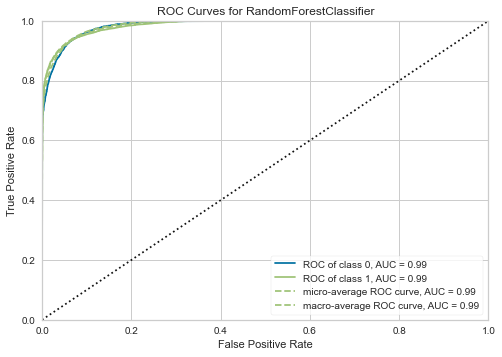

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
plot_model(tuned_rf, plot = 'auc')

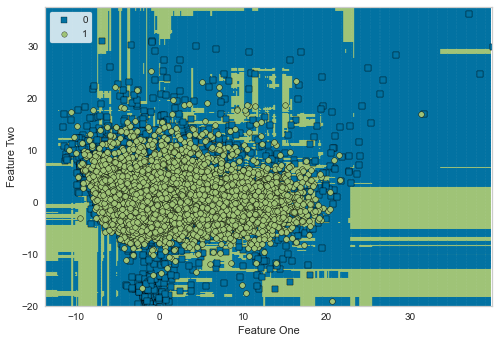

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
# Decision Boundary
plot_model(tuned_rf, plot = 'boundary')

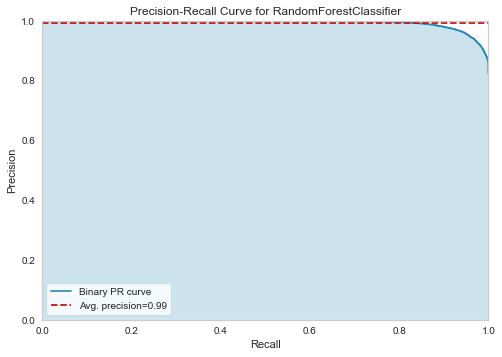

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
# Precision Recall Curve
plot_model(tuned_rf, plot = 'pr')

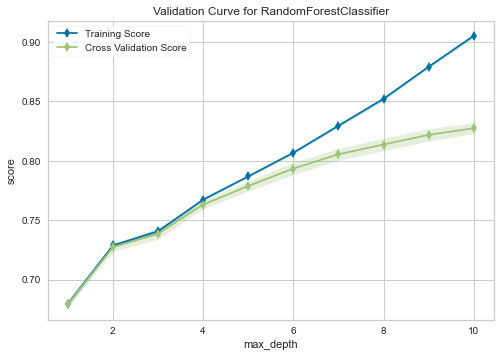

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_rf, plot = 'vc')

In [ ]:
interpret_model(catb)